<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#obtain-prediction-from-each-model" data-toc-modified-id="obtain-prediction-from-each-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>obtain prediction from each model</a></span></li><li><span><a href="#Model-Performance-Comparison" data-toc-modified-id="Model-Performance-Comparison-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Performance Comparison</a></span></li><li><span><a href="#Show-a-few-confusion-matries" data-toc-modified-id="Show-a-few-confusion-matries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Show a few confusion matries</a></span><ul class="toc-item"><li><span><a href="#resnet18" data-toc-modified-id="resnet18-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>resnet18</a></span></li><li><span><a href="#resnet50" data-toc-modified-id="resnet50-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>resnet50</a></span></li><li><span><a href="#resnet152" data-toc-modified-id="resnet152-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>resnet152</a></span></li><li><span><a href="#squeeze-net" data-toc-modified-id="squeeze-net-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>squeeze net</a></span></li><li><span><a href="#vgg" data-toc-modified-id="vgg-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>vgg</a></span></li><li><span><a href="#alexnet" data-toc-modified-id="alexnet-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>alexnet</a></span></li></ul></li><li><span><a href="#Dataset-distribution" data-toc-modified-id="Dataset-distribution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dataset distribution</a></span><ul class="toc-item"><li><span><a href="#Overall-Dataset" data-toc-modified-id="Overall-Dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Overall Dataset</a></span></li><li><span><a href="#train-set,-test-set" data-toc-modified-id="train-set,-test-set-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>train set, test set</a></span></li></ul></li><li><span><a href="#training-history" data-toc-modified-id="training-history-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>training history</a></span><ul class="toc-item"><li><span><a href="#res18" data-toc-modified-id="res18-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>res18</a></span></li><li><span><a href="#res50" data-toc-modified-id="res50-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>res50</a></span></li><li><span><a href="#res152" data-toc-modified-id="res152-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>res152</a></span></li><li><span><a href="#squeeze" data-toc-modified-id="squeeze-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>squeeze</a></span></li><li><span><a href="#vgg" data-toc-modified-id="vgg-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>vgg</a></span></li><li><span><a href="#alexnet" data-toc-modified-id="alexnet-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>alexnet</a></span></li></ul></li></ul></div>

In [2]:
from config import MODELS, SAVE_MODELS
from tqdm import tqdm
import warnings
import pandas as pd
from performance import *
warnings.filterwarnings("ignore")

### obtain prediction from each model 
skip if csv files are available in outputs


In [2]:
with tqdm(total=100) as pbar:        
    for idx, (model, model_param_path) in enumerate(zip(MODELS, SAVE_MODELS)): 
        command = ('python predict.py '
                   '--model_name {model_name} '
                   '--path {model_path} '
                   .format(model_name = model, model_path = model_param_path))
        !{command}
        pbar.update(100 / len(MODELS))

100%|██████████| 100.00000000000001/100 [01:11<00:00,  1.40it/s]


### Model Performance Comparison

In [3]:
multi_class_performance = report_performance(binary = False)
multi_class_performance.T

,accuracy,binary_acc,f1,precision,recall
res18,0.72,0.51,0.71,0.72,0.72
res34,0.72,0.53,0.71,0.73,0.72
res50,0.71,0.55,0.70,0.73,0.71
res101,0.71,0.50,0.69,0.72,0.71
res152,0.59,0.49,0.58,0.70,0.59
vgg,0.75,0.75,0.75,0.76,0.75
squeeze,0.55,0.34,0.51,0.56,0.55
alexnet,0.62,0.40,0.60,0.61,0.62
densenet,0.74,0.64,0.74,0.74,0.74


In [4]:
binary_class_performance = report_performance(binary = True)
binary_class_performance.T

,accuracy,binary_acc,f1,precision,recall
res18,0.78,0.78,0.76,0.81,0.72
res34,0.78,0.78,0.77,0.81,0.75
res50,0.78,0.78,0.78,0.78,0.79
res101,0.77,0.77,0.76,0.81,0.71
res152,0.68,0.68,0.75,0.62,0.95
vgg,0.81,0.81,0.82,0.78,0.85
squeeze,0.70,0.70,0.75,0.64,0.89
alexnet,0.72,0.72,0.70,0.73,0.68
densenet,0.80,0.80,0.80,0.80,0.80


In [13]:
def side_by_side_confusion_matrix(title, target, preds, figsize=(15, 10)):
    labels = ['VeryMild', 'Moderate', 'Mild', 'NonDemented']
    labels_bi = ["NonDemented", "Demented"]
    target_bi = [0 if label == 3 else 1 for label in target]  # 0 not demented
    preds_bi = [0 if label == 3 else 1 for label in preds]  # 0 not demented
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plot_confusion_matrix(confusion_matrix(target, preds), m_ax=ax1, classes=labels)
    plot_confusion_matrix(confusion_matrix(target_bi, preds_bi), m_ax=ax2, classes=labels_bi)
    plt.tight_layout(pad=3)
    fig.suptitle(title, fontsize = 15)
    plt.show()

### Show a few confusion matries

In [20]:
def model_confusion_matrix(model_name):
    output_df = pd.read_csv("outputs/" + model_name + "_outputs.csv")
    target, preds = output_df['label'], output_df['output']
    side_by_side_confusion_matrix(model, target, preds, figsize = (13, 5))

#### resnet18

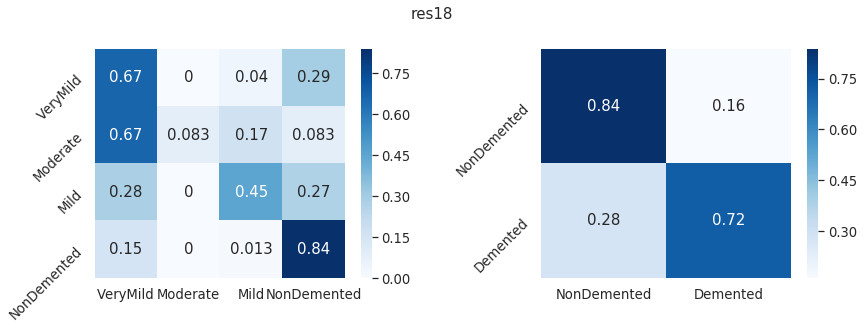

In [21]:
model = "res18"
model_confusion_matrix(model)

#### resnet50

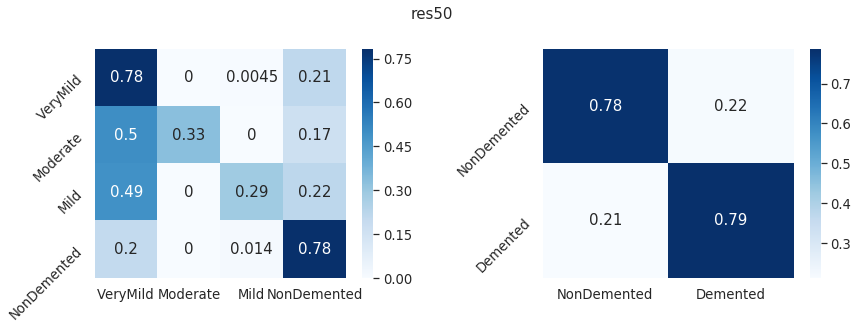

In [22]:
model = "res50"
model_confusion_matrix(model)

#### resnet152

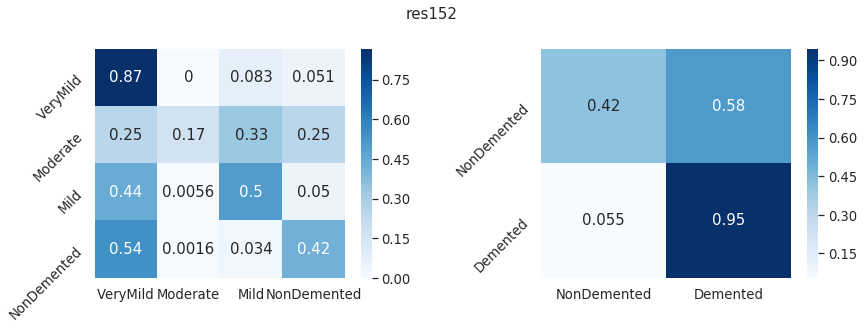

In [23]:
model = "res152"
model_confusion_matrix(model)

#### squeeze net 

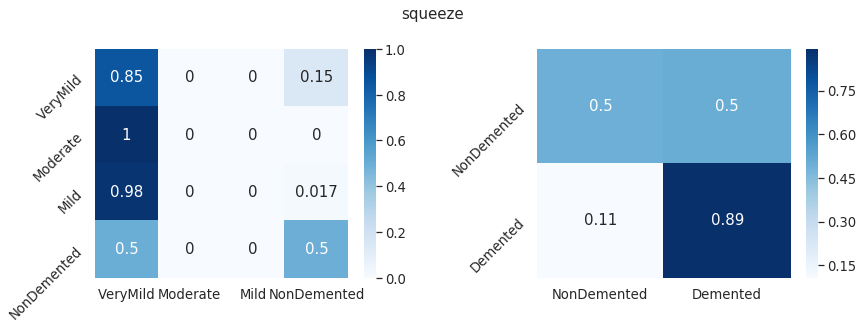

In [24]:
model = "squeeze"
model_confusion_matrix(model)

#### vgg

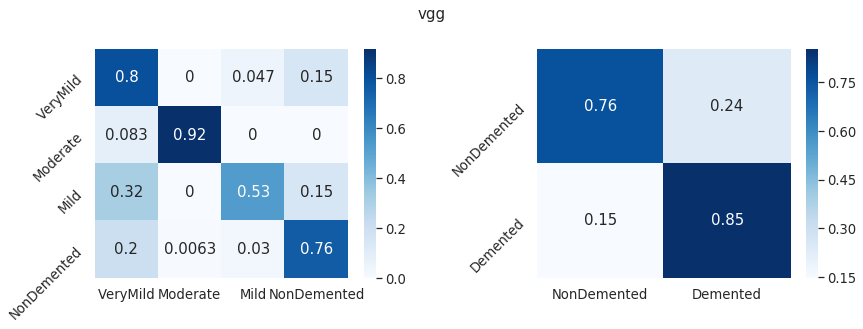

In [25]:
model = "vgg"
model_confusion_matrix(model)

#### alexnet

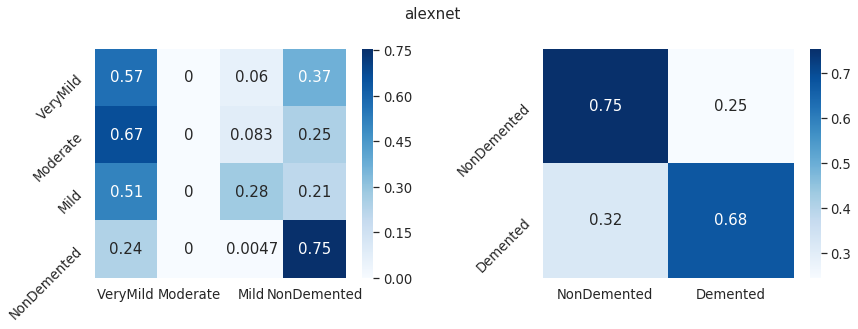

In [29]:
model = "alexnet"
model_confusion_matrix(model)

In [30]:
#### Dense net

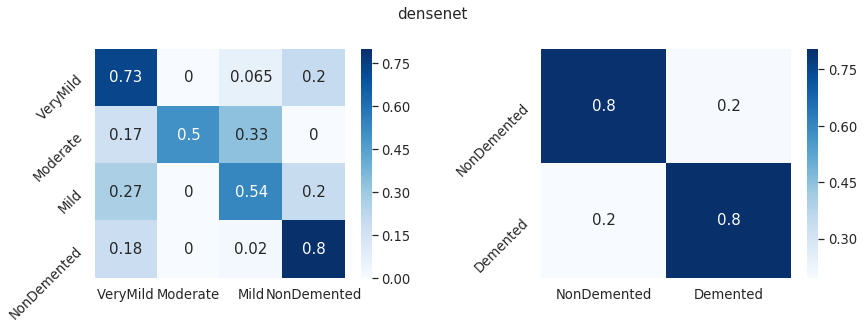

In [32]:
model = "densenet"
model_confusion_matrix(model)

### Dataset distribution

In [33]:
import pandas as pd
df = pd.read_csv("dataset.csv")

,path,label,type
0,Alzheimer_s Dataset/test/VeryMildDemented/28 (...,VeryMildDemented,test
1,Alzheimer_s Dataset/test/VeryMildDemented/29 (...,VeryMildDemented,test
2,Alzheimer_s Dataset/test/VeryMildDemented/32 (...,VeryMildDemented,test
3,Alzheimer_s Dataset/test/VeryMildDemented/31 (...,VeryMildDemented,test
4,Alzheimer_s Dataset/test/VeryMildDemented/27 (...,VeryMildDemented,test


#### Overall Dataset 
imbalance dataset problem

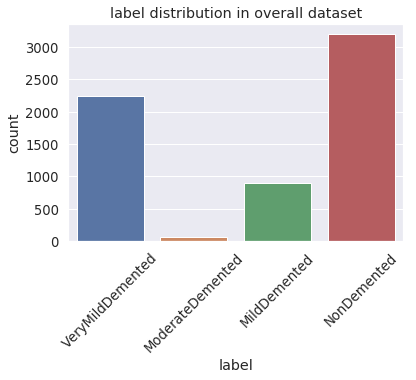

In [35]:
fig = sns.countplot(df['label'])
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.set_title("label distribution in overall dataset")
plt.show()

#### train set, test set

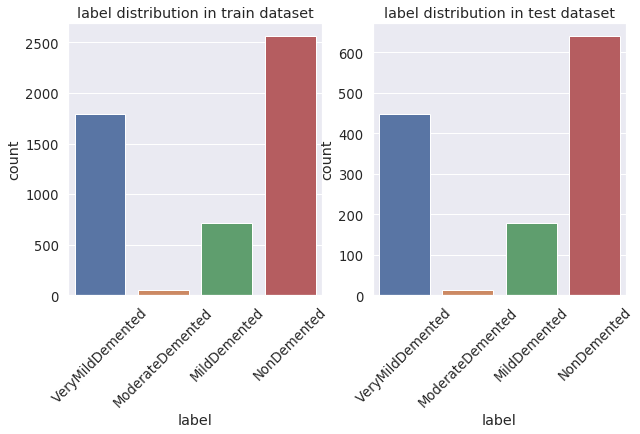

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
subfig = sns.countplot(df[df['type'] == 'train']['label'], ax= ax1)
subfig.set_xticklabels(subfig.get_xticklabels(), rotation=45)
subfig.set_title("label distribution in train dataset")
subfig = sns.countplot(df[df['type'] == 'test']['label'], ax = ax2)
subfig.set_xticklabels(subfig.get_xticklabels(), rotation=45)
subfig.set_title("label distribution in test dataset")
plt.show()

### training history 

In [5]:
def get_history(model_name):
    train_hist = extract_train_history(model_name)
    plot_train_hist(train_hist, model_name)

#### res18

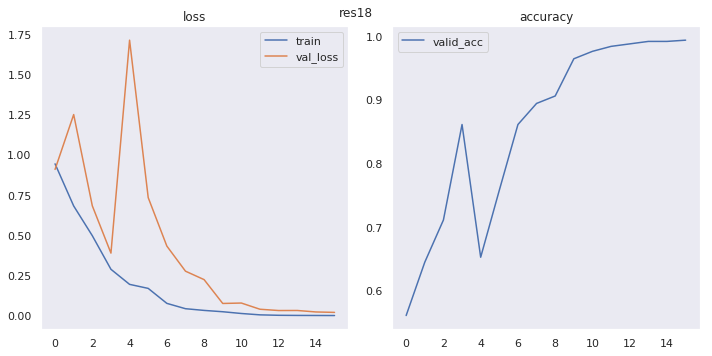

In [6]:
get_history("res18")

#### res50

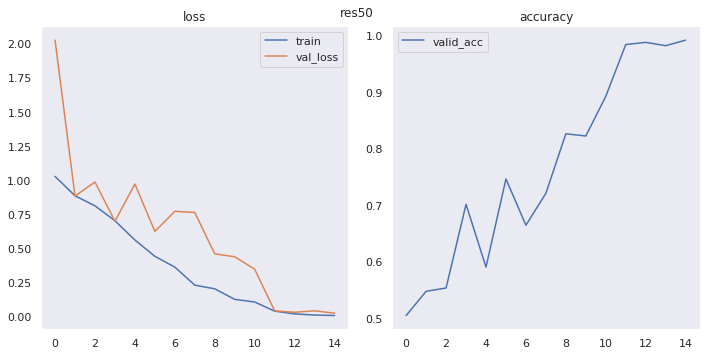

In [7]:
get_history("res50")

#### res152

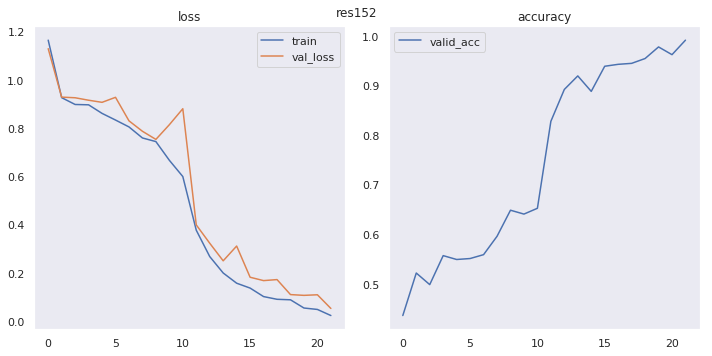

In [10]:
get_history("res152")

#### squeeze

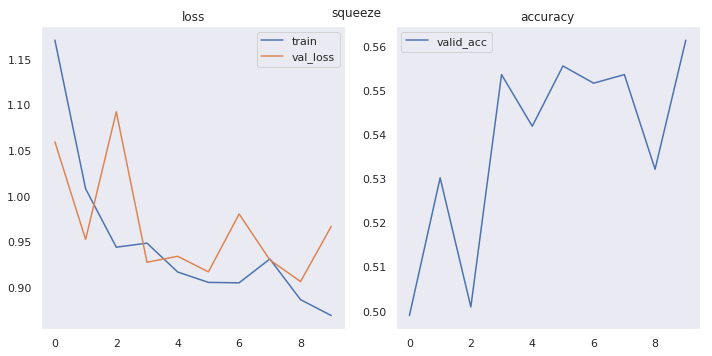

In [11]:
get_history("squeeze")

#### vgg

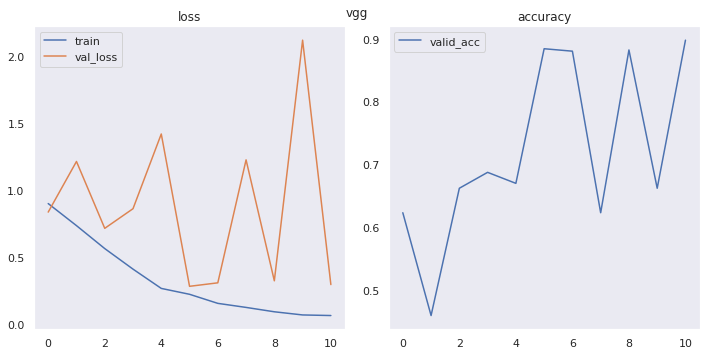

In [12]:
get_history("vgg")

#### alexnet

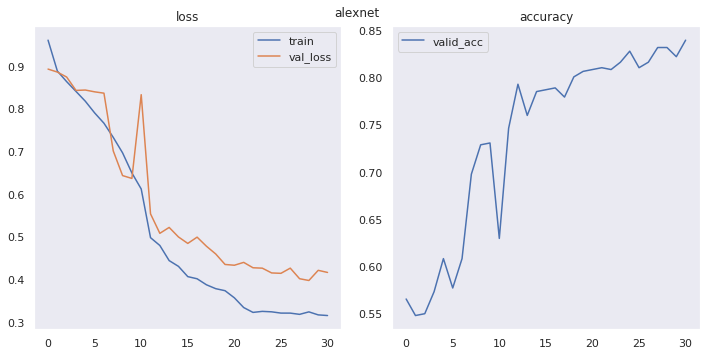

In [13]:
get_history("alexnet")